In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SLNet, SUnet, SL_AEnet, AEnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]

In [5]:
net1 = AEnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  66%|██████▌   | 603/916 [00:25<00:13, 23.31batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 27.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.12296890756155987
Validation round:  35%|███▍      | 317/916 [00:13<00:26, 22.51batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 21.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.10857894218742327
Validation round:  12%|█▏        | 109/916 [00:05<00:35, 22.49batch/s]


Validation round:  85%|████████▌ | 781/916 [00:33<00:05, 23.49batch/s]


Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 24.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.10086547058710105
Validation round:  56%|█████▌    | 511/916 [00:21<00:16, 23.94batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.099882043515816
Validation round:  10%|▉         | 90/916 [00:04<00:36, 22.34batch/s]


Validation round:  81%|████████  | 740/916 [00:29<00:08, 20.75batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 23.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.09187633187131851
Epoch 1/5: 100%|██████████| 7329/7329 [03:53<00:00, 31.37img/s, loss (batch)=0.153] 
INFO: Checkpoint 1 saved !
Validation round:  35%|███▌      | 321/916 [00:13<00:25, 22.97batch/s]


Validation round:  83%|████████▎ | 761/916 [00:31<00:07, 21.72batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 22.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.0905726047143275
Validation round:  45%|████▌     | 415/916 [00:17<00:23, 21.57batch/s]


Validation round:  99%|█████████▉| 910/916 [00:38<00:00, 20.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.09481959310095904
Validation round:   8%|▊         | 73/916 [00:03<00:44, 19.05batch/s]


Validation round:  77%|███████▋  | 705/916 [00:28<00:08, 26.25batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 23.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.08675081405674787
Validation round:  31%|███       | 285/916 [00:11<00:32, 19.66batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 28.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.08436057554744997
Validation round:  11%|█         | 99/916 [00:04<00:36, 22.53batch/s]


Validation round:  83%|████████▎ | 758/916 [00:31<00:06, 25.76batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 23.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.08424679659241932
Epoch 2/5: 100%|██████████| 7329/7329 [03:47<00:00, 32.17img/s, loss (batch)=0.179] 
INFO: Checkpoint 2 saved !
Validation round:  41%|████▏     | 378/916 [00:15<00:24, 22.06batch/s]


Validation round:  99%|█████████▉| 908/916 [00:36<00:00, 22.80batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.08073695339913191
Validation round:  79%|███████▉  | 725/916 [00:30<00:08, 22.79batch/s]


Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 24.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.08131420003925348
Validation round:  42%|████▏     | 388/916 [00:15<00:20, 25.31batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 27.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.08385120912182539
Validation round:   8%|▊         | 74/916 [00:03<00:34, 24.37batch/s]


Validation round:  69%|██████▊   | 628/916 [00:26<00:10, 27.37batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.08046733762857435
Validation round:  32%|███▏      | 295/916 [00:12<00:25, 24.14batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.01batch/s]


                                                                      INFO: Validation Dice Loss: 0.08295272420034398
Epoch 3/5: 100%|██████████| 7329/7329 [03:46<00:00, 32.40img/s, loss (batch)=0.118] 
INFO: Checkpoint 3 saved !
Validation round:  57%|█████▋    | 522/916 [00:21<00:17, 22.40batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 28.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.08014999290188067
Validation round:  18%|█▊        | 167/916 [00:07<00:28, 25.94batch/s]


Validation round:  77%|███████▋  | 708/916 [00:28<00:08, 25.83batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.07589490706808702
Validation round:  50%|████▉     | 455/916 [00:19<00:19, 24.25batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 24.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.07636368572386591
Validation round:  19%|█▉        | 176/916 [00:07<00:32, 22.86batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 21.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.07410884723392637
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  50%|█████     | 462/916 [00:23<00:25, 17.97batch/s]


Validation round:  99%|█████████▉| 910/916 [00:46<00:00, 19.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.07307260154896948
Epoch 4/5: 100%|██████████| 7329/7329 [03:56<00:00, 31.05img/s, loss (batch)=0.129] 
INFO: Checkpoint 4 saved !
Validation round:   2%|▏         | 17/916 [00:01<05:25,  2.76batch/s]


Validation round:  56%|█████▌    | 510/916 [00:26<00:24, 16.38batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 18.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.07782558425772919
Validation round:   9%|▉         | 87/916 [00:04<00:35, 23.64batch/s]


Validation round:  72%|███████▏  | 656/916 [00:28<00:09, 27.04batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 28.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.07430647241203805
Validation round:  30%|███       | 275/916 [00:11<00:31, 20.38batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.07425376495517237


Validation round:  66%|██████▌   | 601/916 [00:24<00:14, 21.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 30.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.07041001400410088
Validation round:  37%|███▋      | 335/916 [00:13<00:23, 24.46batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 26.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.07089366484840104
Epoch 5/5: 100%|██████████| 7329/7329 [03:58<00:00, 30.77img/s, loss (batch)=0.119] 
INFO: Checkpoint 5 saved !


In [6]:
net2 = SL_AEnet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  58%|█████▊    | 535/916 [00:22<00:17, 22.13batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 24.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.15565225068788863
Validation round:  22%|██▏       | 201/916 [00:08<00:29, 24.34batch/s]


Validation round:  92%|█████████▏| 839/916 [00:33<00:03, 19.59batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 21.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.14655271439312847
Validation round:  55%|█████▍    | 500/916 [00:20<00:17, 23.56batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.15460659383783953
Validation round:  22%|██▏       | 205/916 [00:09<00:33, 21.50batch/s]


Validation round:  91%|█████████▏| 838/916 [00:34<00:02, 27.07batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.14045150918829127
Validation round:  49%|████▉     | 452/916 [00:18<00:18, 25.26batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 26.94batch/s]
                                                                      INFO: Validation Dice Loss: 0.13496521463430605
Epoch 1/5: 100%|██████████| 7329/7329 [03:43<00:00, 32.84img/s, loss (batch)=0.479] 
INFO: Checkpoint 1 saved !
Validation round:   8%|▊         | 77/916 [00:03<00:37, 22.20batch/s]


Validation round:  79%|███████▊  | 721/916 [00:29<00:08, 23.27batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.10158909964639547
Validation round:  33%|███▎      | 303/916 [00:13<00:30, 19.79batch/s]


Validation round:  92%|█████████▏| 846/916 [00:35<00:03, 20.05batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 27.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.10372893365840204
Validation round:  58%|█████▊    | 533/916 [00:22<00:17, 22.53batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 22.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.10155946347358186
Validation round:  22%|██▏       | 204/916 [00:09<00:30, 23.14batch/s]


Validation round:  78%|███████▊  | 710/916 [00:29<00:09, 21.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 23.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.0979005367979082
Validation round:  38%|███▊      | 347/916 [00:15<00:20, 27.75batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 27.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.09195045944644895
Epoch 2/5: 100%|██████████| 7329/7329 [03:48<00:00, 32.14img/s, loss (batch)=0.193] 
INFO: Checkpoint 2 saved !
Validation round:   9%|▉         | 86/916 [00:04<00:37, 22.26batch/s]


Validation round:  81%|████████  | 744/916 [00:32<00:07, 23.50batch/s]


Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 21.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.09653953991537531
Validation round:  42%|████▏     | 386/916 [00:17<00:20, 25.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 29.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.09062431149152168
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  56%|█████▌    | 513/916 [00:22<00:18, 21.77batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 24.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.08955757022229345
Validation round:  22%|██▏       | 205/916 [00:09<00:31, 22.78batch/s]


Validation round:  87%|████████▋ | 801/916 [00:34<00:04, 25.87batch/s]


Validation round:  99%|█████████▉| 911/916 [00:38<00:00, 23.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.08953498812254079
Validation round:  41%|████▏     | 378/916 [00:16<00:23, 22.54batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 25.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.09322471204966176
Epoch 3/5: 100%|██████████| 7329/7329 [03:54<00:00, 31.21img/s, loss (batch)=0.183] 
INFO: Checkpoint 3 saved !
Validation round:   2%|▏         | 20/916 [00:01<04:10,  3.58batch/s]


Validation round:  77%|███████▋  | 703/916 [00:31<00:09, 21.83batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 20.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.08906435829843497
Validation round:  44%|████▍     | 401/916 [00:16<00:23, 21.53batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 26.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.08748904249618668
Validation round:   2%|▏         | 20/916 [00:01<03:13,  4.63batch/s]


Validation round:  72%|███████▏  | 657/916 [00:27<00:10, 23.84batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 21.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.09281690520393016
Validation round:  32%|███▏      | 297/916 [00:14<00:27, 22.12batch/s]


Validation round: 100%|█████████▉| 913/916 [00:41<00:00, 22.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.0929276992091055
Validation round:   0%|          | 1/916 [00:00<11:48,  1.29batch/s]


Validation round:  64%|██████▍   | 588/916 [00:27<00:12, 25.75batch/s]


Validation round:  99%|█████████▉| 909/916 [00:42<00:00, 23.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.08782133994436941
Epoch 4/5: 100%|██████████| 7329/7329 [04:00<00:00, 30.47img/s, loss (batch)=0.177] 
INFO: Checkpoint 4 saved !
Validation round:  20%|██        | 186/916 [00:08<00:29, 24.50batch/s]


Validation round:  78%|███████▊  | 713/916 [00:32<00:08, 24.59batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 24.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.08622622241034258
Validation round:  45%|████▌     | 415/916 [00:17<00:22, 21.93batch/s]


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 21.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.08523862417705975
Validation round:  18%|█▊        | 169/916 [00:07<00:28, 25.85batch/s]


Validation round:  80%|████████  | 734/916 [00:32<00:08, 22.14batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 22.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.08507693522329153
Validation round:  38%|███▊      | 352/916 [00:15<00:30, 18.36batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 24.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.08605886468720748
Validation round:  12%|█▏        | 107/916 [00:05<00:36, 21.92batch/s]


Validation round:  66%|██████▌   | 603/916 [00:26<00:18, 16.89batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 22.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.08453123152711506
Epoch 5/5: 100%|██████████| 7329/7329 [04:00<00:00, 30.44img/s, loss (batch)=0.162] 
INFO: Checkpoint 5 saved !


In [7]:
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=1,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  61%|██████    | 560/916 [00:25<00:18, 19.64batch/s]


Validation round:  99%|█████████▉| 909/916 [00:40<00:00, 22.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.29584938193382654
Epoch 1/5:  40%|███▉      | 2928/7329 [01:10<00:29, 151.59img/s, loss (batch)=0.342]


Validation round:  83%|████████▎ | 763/916 [00:33<00:06, 22.47batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 26.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.2652912114352378
Validation round:  37%|███▋      | 343/916 [00:15<00:23, 24.02batch/s]


Validation round:  95%|█████████▌| 871/916 [00:38<00:02, 20.69batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 23.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.275477815988803
Validation round:  57%|█████▋    | 522/916 [00:23<00:15, 24.89batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 27.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.0720086852617269
Validation round:  14%|█▎        | 124/916 [00:05<00:32, 24.59batch/s]


Validation round:  71%|███████   | 649/916 [00:26<00:11, 22.81batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 30.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.06990679205440017
Epoch 1/5: 100%|██████████| 7329/7329 [03:59<00:00, 30.61img/s, loss (batch)=0.252] 
INFO: Checkpoint 1 saved !
Validation round:  24%|██▍       | 218/916 [00:09<00:30, 22.70batch/s]


Validation round:  90%|████████▉ | 824/916 [00:34<00:03, 27.13batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 22.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.06668298432855627
Validation round:  46%|████▌     | 418/916 [00:17<00:22, 22.11batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.06346258902556251
Validation round:   3%|▎         | 26/916 [00:01<03:06,  4.76batch/s]


Validation round:  60%|██████    | 551/916 [00:22<00:16, 21.82batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 28.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.0613378725832076
Validation round:  21%|██▏       | 196/916 [00:08<00:31, 22.54batch/s]


Validation round:  84%|████████▎ | 765/916 [00:31<00:06, 22.83batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 23.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.05954138676770129
Validation round:  46%|████▌     | 423/916 [00:17<00:22, 21.76batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 27.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.05739137046364457
Epoch 2/5: 100%|██████████| 7329/7329 [03:46<00:00, 32.30img/s, loss (batch)=0.145] 
INFO: Checkpoint 2 saved !
Validation round:  10%|█         | 93/916 [00:04<00:35, 23.20batch/s]


Validation round:  77%|███████▋  | 705/916 [00:29<00:08, 25.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 24.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.05645532345635142
Validation round:  34%|███▍      | 311/916 [00:13<00:23, 25.57batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 28.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.056350805385924845
Epoch 3/5:  59%|█████▉    | 4352/7329 [01:39<00:16, 178.45img/s, loss (batch)=0.104] 


Validation round:  66%|██████▌   | 603/916 [00:24<00:13, 23.47batch/s]


Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 22.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.04713097923968036
Validation round:  22%|██▏       | 199/916 [00:09<00:31, 22.92batch/s]


Validation round:  84%|████████▍ | 773/916 [00:33<00:06, 21.24batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 27.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.040148864032529846
Validation round:  45%|████▍     | 412/916 [00:17<00:19, 25.54batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.04039334653831986
Epoch 3/5: 100%|██████████| 7329/7329 [03:51<00:00, 31.65img/s, loss (batch)=0.103]  
INFO: Checkpoint 3 saved !


Validation round:  79%|███████▉  | 722/916 [00:31<00:09, 21.48batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 24.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.03900564557925582
Validation round:  46%|████▌     | 418/916 [00:18<00:24, 20.66batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 23.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.039377965716295364
Validation round:   6%|▋         | 58/916 [00:03<00:52, 16.32batch/s]


Validation round:  73%|███████▎  | 669/916 [00:27<00:08, 27.54batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 23.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.03957673166288819
Validation round:  27%|██▋       | 247/916 [00:10<00:21, 30.62batch/s]


Validation round:  95%|█████████▌| 874/916 [00:35<00:01, 25.77batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.038694171121091823
Validation round:  61%|██████    | 560/916 [00:22<00:14, 24.84batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.03817880901154212
Epoch 4/5: 100%|██████████| 7329/7329 [03:51<00:00, 31.63img/s, loss (batch)=0.0938] 
INFO: Checkpoint 4 saved !
Validation round:  18%|█▊        | 166/916 [00:07<00:31, 23.82batch/s]


Validation round:  77%|███████▋  | 707/916 [00:29<00:09, 23.08batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 24.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.0393305019959482
Validation round:  37%|███▋      | 340/916 [00:14<00:23, 24.29batch/s]


Validation round:  94%|█████████▎| 858/916 [00:34<00:02, 27.28batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 28.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.03794164810833973
Validation round:  56%|█████▌    | 513/916 [00:22<00:18, 21.63batch/s]


Validation round:  99%|█████████▉| 911/916 [00:39<00:00, 23.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.03782653696347012
Validation round:  24%|██▍       | 218/916 [00:09<00:32, 21.78batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 24.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.03798264979209962
Validation round:   0%|          | 1/916 [00:00<11:12,  1.36batch/s]


Validation round:  63%|██████▎   | 576/916 [00:24<00:13, 24.55batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.03845015360148193
Epoch 5/5: 100%|██████████| 7329/7329 [03:52<00:00, 31.56img/s, loss (batch)=0.083]  
INFO: Checkpoint 5 saved !


In [8]:
net4 = SLNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  65%|██████▌   | 597/916 [00:26<00:15, 21.06batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 26.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.07836743797212188
Validation round:  21%|██        | 193/916 [00:08<00:31, 22.65batch/s]


Validation round:  81%|████████  | 741/916 [00:31<00:08, 21.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 26.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.07639673872806099
Validation round:  42%|████▏     | 386/916 [00:16<00:22, 23.07batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 29.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.07365559348958549
Validation round:   4%|▍         | 41/916 [00:02<00:59, 14.80batch/s]


Validation round:  69%|██████▊   | 628/916 [00:26<00:11, 25.71batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 23.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.07208810867050329
Validation round:  33%|███▎      | 304/916 [00:13<00:26, 23.11batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 22.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.07205451471836806
Epoch 1/5: 100%|██████████| 7329/7329 [03:52<00:00, 31.52img/s, loss (batch)=0.34]  
INFO: Checkpoint 1 saved !
Validation round:   1%|          | 6/916 [00:00<08:05,  1.87batch/s]


Validation round:  61%|██████▏   | 563/916 [00:23<00:14, 24.48batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 28.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.06838763915165022
Validation round:  22%|██▏       | 200/916 [00:09<00:38, 18.45batch/s]


Validation round:  86%|████████▌ | 787/916 [00:32<00:05, 21.65batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.06630721554875894
Validation round:  47%|████▋     | 428/916 [00:17<00:19, 24.93batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 24.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.06538758653838302
Validation round:   8%|▊         | 74/916 [00:03<00:47, 17.84batch/s]


Validation round:  77%|███████▋  | 709/916 [00:28<00:07, 26.78batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.0669344097912702
Validation round:  42%|████▏     | 387/916 [00:16<00:23, 22.75batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 24.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.06208868211696502
Epoch 2/5: 100%|██████████| 7329/7329 [03:48<00:00, 32.11img/s, loss (batch)=0.223] 
INFO: Checkpoint 2 saved !


Validation round:  51%|█████     | 469/916 [00:19<00:16, 26.65batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 25.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.06151980574865008
Validation round:  13%|█▎        | 121/916 [00:05<00:29, 26.72batch/s]


Validation round:  67%|██████▋   | 613/916 [00:25<00:12, 23.94batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 24.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.058016539335771417
Validation round:  27%|██▋       | 251/916 [00:11<00:30, 21.85batch/s]


Validation round:  81%|████████  | 743/916 [00:30<00:07, 23.57batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 29.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.0579106066961606
Validation round:  40%|████      | 369/916 [00:16<00:24, 22.45batch/s]


Validation round:  99%|█████████▉| 911/916 [00:39<00:00, 24.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.05685813871403449


Validation round:  61%|██████    | 559/916 [00:24<00:12, 28.49batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 25.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.042275466000474174
Epoch 3/5: 100%|██████████| 7329/7329 [03:50<00:00, 31.78img/s, loss (batch)=0.091]  
INFO: Checkpoint 3 saved !
Validation round:  21%|██        | 191/916 [00:08<00:24, 29.44batch/s]


Validation round:  91%|█████████▏| 837/916 [00:34<00:02, 28.89batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 27.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.0423790570267163
Validation round:  46%|████▌     | 423/916 [00:19<00:27, 17.95batch/s]


Validation round:  99%|█████████▉| 911/916 [00:40<00:00, 28.06batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 27.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.04105089542224157
Validation round:  56%|█████▋    | 516/916 [00:21<00:18, 21.35batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.040512424491053065
Validation round:  13%|█▎        | 121/916 [00:06<00:39, 19.91batch/s]


Validation round:  67%|██████▋   | 612/916 [00:28<00:19, 15.35batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 21.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.04140696978790271
Validation round:   8%|▊         | 77/916 [00:05<00:50, 16.57batch/s]


Validation round:  56%|█████▋    | 517/916 [00:33<00:34, 11.57batch/s]


Validation round:  99%|█████████▉| 911/916 [00:57<00:00, 15.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.04072058116244437
Epoch 4/5: 100%|██████████| 7329/7329 [04:23<00:00, 27.86img/s, loss (batch)=0.0816] 
INFO: Checkpoint 4 saved !
Validation round:   1%|          | 9/916 [00:01<08:09,  1.85batch/s]


Validation round:  47%|████▋     | 431/916 [00:25<00:28, 17.07batch/s]


Validation round:  94%|█████████▍| 859/916 [00:49<00:02, 20.00batch/s]


Validation round: 100%|██████████| 916/916 [00:53<00:00, 17.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.04190474445219904
Validation round:  37%|███▋      | 337/916 [00:20<00:37, 15.45batch/s]


Validation round:  76%|███████▌  | 694/916 [00:41<00:14, 15.03batch/s]


Validation round: 100%|█████████▉| 915/916 [00:54<00:00, 18.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.03873521689016486
Validation round:  15%|█▌        | 141/916 [00:09<00:47, 16.37batch/s]


Validation round:  58%|█████▊    | 528/916 [00:32<00:21, 18.42batch/s]


Validation round: 100%|██████████| 916/916 [00:53<00:00, 17.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.038879561095648975
Validation round:   5%|▌         | 49/916 [00:03<01:03, 13.74batch/s]


Validation round:  51%|█████▏    | 470/916 [00:25<00:21, 20.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 16.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.03862806747964376
Validation round:   3%|▎         | 26/916 [00:02<02:33,  5.81batch/s]


Validation round:  53%|█████▎    | 483/916 [00:26<00:26, 16.46batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 19.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.03878718048464263
Epoch 5/5: 100%|██████████| 7329/7329 [05:10<00:00, 23.60img/s, loss (batch)=0.0949] 
INFO: Checkpoint 5 saved !


configuring combined plots


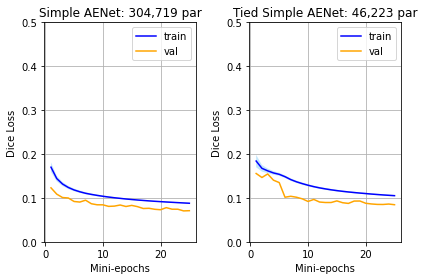

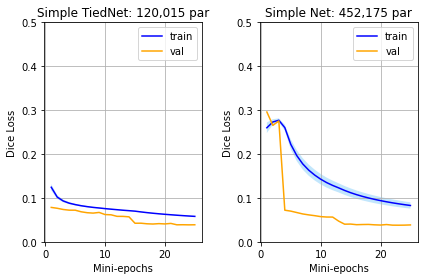

In [12]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Simple AENet: 304,719 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("Tied Simple AENet: 46,223 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.5])
plt.title("Simple Net: 452,175 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.5])
plt.title("Simple TiedNet: 120,015 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores4, train_var_4)]
ziptraindown = [a - b for a, b in zip(train_scores4, train_var_4)]
zipvalup = [a + b for a, b in zip(val_scores4, val_var_4)]
zipvaldown = [a - b for a, b in zip(val_scores4, val_var_4)]

plt.plot(x_values, train_scores4, color="blue", label="train")
a1.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores4, color="orange", label="val")
a1.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.close()